# NB_190124T1715_practice_from_cheatsheet

### 1.Import pandas

In [1]:
import pandas as pd

### 2.Create pd series from 
- `[3, -5, 7, 4]` with index `["a", "b", "c", "d"]`

In [9]:
s = pd.Series([3, -5, 7, 4], index=["a", "b", "c", "d"])
s

a    3
b   -5
c    7
d    4
dtype: int64

### 3.Create Dataframe from 
- data = {
    'Country': ['Belgium', 'India', 'Brazil'],
    'Capital': ['Brussels', 'New Delhi', 'Brasília'],
    'Population': [11190846, 1303171035, 207847528]
}

In [22]:
data = {
    "Country": ["Belgium", "India", "Brazil"],
    "Capital": ["Brussels", "New Delhi", "Brasília"],
    "Population": [11190846, 1303171035, 207847528],
}
df = pd.DataFrame(data)
df

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


### 4. Dropping

- drop values ['a', 'c'] from rows 


In [24]:
s.drop(labels=["a", "c"])

b   -5
d    4
dtype: int64

- drop values from columns `Country`

In [28]:
df_ = df.drop(labels="Country", axis=1)
df_

,Capital,Population
0,Brussels,11190846
1,New Delhi,1303171035
2,Brasília,207847528


### 5.Asking for help

In [29]:
help(pd.Series.loc)

Help on property:

    Access a group of rows and columns by label(s) or a boolean array.
    
    ``.loc[]`` is primarily label based, but may also be used with a
    boolean array.
    
    Allowed inputs are:
    
    - A single label, e.g. ``5`` or ``'a'``, (note that ``5`` is
      interpreted as a *label* of the index, and **never** as an
      integer position along the index).
    - A list or array of labels, e.g. ``['a', 'b', 'c']``.
    - A slice object with labels, e.g. ``'a':'f'``.
    
      .. warning:: Note that contrary to usual python slices, **both** the
          start and the stop are included
    
    - A boolean array of the same length as the axis being sliced,
      e.g. ``[True, False, True]``.
    - An alignable boolean Series. The index of the key will be aligned before
      masking.
    - An alignable Index. The Index of the returned selection will be the input.
    - A ``callable`` function with one argument (the calling Series or
      DataFrame) and that

In [37]:
?pd.Series.loc

Type:        property
String form: <property object at 0x000001A45110E070>
Docstring:  
Access a group of rows and columns by label(s) or a boolean array.

``.loc[]`` is primarily label based, but may also be used with a
boolean array.

Allowed inputs are:

- A single label, e.g. ``5`` or ``'a'``, (note that ``5`` is
  interpreted as a *label* of the index, and **never** as an
  integer position along the index).
- A list or array of labels, e.g. ``['a', 'b', 'c']``.
- A slice object with labels, e.g. ``'a':'f'``.

  .. warning:: Note that contrary to usual python slices, **both** the
      start and the stop are included

- A boolean array of the same length as the axis being sliced,
  e.g. ``[True, False, True]``.
- An alignable boolean Series. The index of the key will be aligned before
  masking.
- An alignable Index. The Index of the returned selection will be the input.
- A ``callable`` function with one argument (the calling Series or
  DataFrame) and that returns valid output f

### 6.Sort and rank
- sort by index
- sort by values
- rank

In [30]:
df

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


In [31]:
df.sort_index(ascending=False)

,Country,Capital,Population
2,Brazil,Brasília,207847528
1,India,New Delhi,1303171035
0,Belgium,Brussels,11190846


In [32]:
df.sort_values(by="Country")

,Country,Capital,Population
0,Belgium,Brussels,11190846
2,Brazil,Brasília,207847528
1,India,New Delhi,1303171035


In [33]:
df.rank()

,Country,Capital,Population
0,1.0,2.0,1.0
1,3.0,3.0,3.0
2,2.0,1.0,2.0


### i/o
- to and from CSV
- to and from excel
- to and from SQL query

#### read and write csv

In [40]:
compression_opts = {"method": "zip", "archive_name": "out.csv"}
df.to_csv("out.zip", index=False, compression=compression_opts)

df_1 = pd.read_csv("out.zip")

In [41]:
df_1

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


#### read and write to sql query or database table

In [43]:
from sqlalchemy import create_engine

engine = create_engine("sqlite:///:memory:")

In [ ]:
# load dataframe in sqlite with table name my_table
df.to_sql("my_table", engine)

In [47]:
pd.read_sql("SELECT * FROM my_table;", engine)

,index,Country,Capital,Population
0,0,Belgium,Brussels,11190846
1,1,India,New Delhi,1303171035
2,2,Brazil,Brasília,207847528


### SELECTION

In [48]:
s

a    3
b   -5
c    7
d    4
dtype: int64

In [49]:
s["b"]

-5

In [50]:
df

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


In [51]:
df[1:]

,Country,Capital,Population
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


In [52]:
df.iloc[[0], [0]]

,Country
0,Belgium


In [56]:
df.loc[[0], ["Country"]]

,Country
0,Belgium


In [60]:
df.iloc[[0], :]["Country"].to_frame()

,Country
0,Belgium


In [62]:
s, s[~(s > 1)]

(a    3
 b   -5
 c    7
 d    4
 dtype: int64,
 b   -5
 dtype: int64)

In [66]:
s[(s < -1) | (s > 3)]

b   -5
c    7
d    4
dtype: int64

In [67]:
df[df["Population"] > 1203171035]

,Country,Capital,Population
1,India,New Delhi,1303171035


- setting

In [70]:
df_2 = df.copy(deep=True)
df_2

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


In [75]:
df_2.iloc[0, :] = [1, 1, 1]

In [76]:
df_2

,Country,Capital,Population
0,1,1,1
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


### RETRIEVING INFORMATION

In [77]:
df

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


In [78]:
df.shape

(3, 3)

In [79]:
df.dtypes

Country       object
Capital       object
Population     int64
dtype: object

In [81]:
df.describe()

,Population
count,3.000000e+00
mean,5.074031e+08
std,6.961346e+08
min,1.119085e+07
25%,1.095192e+08
50%,2.078475e+08
75%,7.555093e+08
max,1.303171e+09


In [82]:
df.index

RangeIndex(start=0, stop=3, step=1)

In [83]:
df.columns

Index(['Country', 'Capital', 'Population'], dtype='object')

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     3 non-null      object
 1   Capital     3 non-null      object
 2   Population  3 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 204.0+ bytes


In [85]:
df.count()

Country       3
Capital       3
Population    3
dtype: int64

In [86]:
df.value_counts()

Country  Capital    Population
Belgium  Brussels   11190846      1
Brazil   Brasília   207847528     1
India    New Delhi  1303171035    1
Name: count, dtype: int64

In [87]:
df.idxmin()

Country       0
Capital       2
Population    0
dtype: int64

In [94]:
df.loc[:, "Population"].mean()

507403136.3333333

### Applying Functions

In [95]:
def f(x):
    return x * 2

In [96]:
df.apply(f)

,Country,Capital,Population
0,BelgiumBelgium,BrusselsBrussels,22381692
1,IndiaIndia,New DelhiNew Delhi,2606342070
2,BrazilBrazil,BrasíliaBrasília,415695056


In [97]:
df.applymap(f)

C:\Users\baksa\AppData\Local\Temp\ipykernel_30612\2173204005.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(f)


,Country,Capital,Population
0,BelgiumBelgium,BrusselsBrussels,22381692
1,IndiaIndia,New DelhiNew Delhi,2606342070
2,BrazilBrazil,BrasíliaBrasília,415695056


In [99]:
# Using apply (new way)
df.apply(lambda x: x.map(f))

,Country,Capital,Population
0,BelgiumBelgium,BrusselsBrussels,22381692
1,IndiaIndia,New DelhiNew Delhi,2606342070
2,BrazilBrazil,BrasíliaBrasília,415695056


In [98]:
df

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


### One hot encoding

In [101]:
pd.get_dummies(pd.Series(list("abca")))

,a,b,c
0,True,False,False
1,False,True,False
2,False,False,True
3,True,False,False


### Reshaping data

In [104]:
data_2 = [
    {"Date": "2016-03-01", "Type": "a", "Value": 11.432},
    {"Date": "2016-03-02", "Type": "b", "Value": 13.031},
    {"Date": "2016-03-01", "Type": "c", "Value": 20.784},
    {"Date": "2016-03-03", "Type": "a", "Value": 99.906},
    {"Date": "2016-03-02", "Type": "a", "Value": 1.303},
    {"Date": "2016-03-03", "Type": "c", "Value": 20.784},
]

df2 = pd.DataFrame(data_2)
df2

,Date,Type,Value
0,2016-03-01,a,11.432
1,2016-03-02,b,13.031
2,2016-03-01,c,20.784
3,2016-03-03,a,99.906
4,2016-03-02,a,1.303
5,2016-03-03,c,20.784


In [108]:
df3 = df2.pivot(index="Date", columns="Type", values="Value")
df3

Type,a,b,c
Date,,,
2016-03-01,11.432,NaN,20.784
2016-03-02,1.303,13.031,NaN
2016-03-03,99.906,NaN,20.784


#### Stack/Unstack

In [118]:
df3.stack(dropna=False), df3.stack().index

(Date        Type
 2016-03-01  a       11.432
             b          NaN
             c       20.784
 2016-03-02  a        1.303
             b       13.031
             c          NaN
 2016-03-03  a       99.906
             b          NaN
             c       20.784
 dtype: float64,
 MultiIndex([('2016-03-01', 'a'),
             ('2016-03-01', 'c'),
             ('2016-03-02', 'a'),
             ('2016-03-02', 'b'),
             ('2016-03-03', 'a'),
             ('2016-03-03', 'c')],
            names=['Date', 'Type']))

### Melt

#### what and when to use

df.melt() is a method in pandas that is used to transform or reshape data. The melt function is useful when you want to change your DataFrame from a wide format to a long format. It unpivots a DataFrame from wide format to long format, optionally leaving identifier variables set.

Here's why and when you might need df.melt():

Data Normalization: When you need to normalize data for analysis or to feed into a machine learning model. Long format is often easier to work with in these scenarios because each row represents a single observation.

Data Visualization: Many visualization libraries prefer data in long format because it makes it easier to map columns to aesthetic attributes like color, size, or x/y positions.

Compliance with Tidy Data Principles: According to Hadley Wickham's principles of tidy data, each variable should form a column, and each observation should form a row. Melting data often helps to achieve this structure.

Combining Multiple Columns: When you have multiple columns that actually represent the same variable and you want to combine them into one column with multiple rows instead.

#### practice

In [119]:
df2

,Date,Type,Value
0,2016-03-01,a,11.432
1,2016-03-02,b,13.031
2,2016-03-01,c,20.784
3,2016-03-03,a,99.906
4,2016-03-02,a,1.303
5,2016-03-03,c,20.784


In [124]:
pd.melt(df2, id_vars=["Date"], value_vars=["Type"], value_name="Observations")

,Date,variable,Observations
0,2016-03-01,Type,a
1,2016-03-02,Type,b
2,2016-03-01,Type,c
3,2016-03-03,Type,a
4,2016-03-02,Type,a
5,2016-03-03,Type,c


### Iteration

In [128]:
for x in df.iterrows():
    print(f"{x}\n")

(0, Country        Belgium
Capital       Brussels
Population    11190846
Name: 0, dtype: object)

(1, Country            India
Capital        New Delhi
Population    1303171035
Name: 1, dtype: object)

(2, Country          Brazil
Capital        Brasília
Population    207847528
Name: 2, dtype: object)



In [129]:
for x in df.items():
    print(f"{x}\n")

('Country', 0    Belgium
1      India
2     Brazil
Name: Country, dtype: object)

('Capital', 0     Brussels
1    New Delhi
2     Brasília
Name: Capital, dtype: object)

('Population', 0      11190846
1    1303171035
2     207847528
Name: Population, dtype: int64)



In [137]:
type(x[1])

pandas.core.series.Series

### Insert new line

In [158]:
df.loc[3] = ["Belgium", "Brussels", 11190846]
df

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528
3,Belgium,Brussels,11190846


In [161]:
df.loc[4] = ["Belgium", "Brussels", 11190846]
df

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528
3,Belgium,Brussels,11190846
4,Belgium,Brussels,11190846


In [163]:
df.loc[10] = ["Belgium", "Brussels", 11190846]
df

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528
3,Belgium,Brussels,11190846
4,Belgium,Brussels,11190846
10,Belgium,Brussels,11190846


In [171]:
df.loc[8] = ["Belgium", "Brussels", 11190846]
df.reset_index().drop(columns=["index"])

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528
3,Belgium,Brussels,11190846
4,Belgium,Brussels,11190846
5,Belgium,Brussels,11190846
6,Belgium,Brussels,11190846


### Missing data

In [165]:
df3

Type,a,b,c
Date,,,
2016-03-01,11.432,NaN,20.784
2016-03-02,1.303,13.031,NaN
2016-03-03,99.906,NaN,20.784


In [166]:
df3.dropna()

Type,a,b,c
Date,,,


In [167]:
df3.fillna(df3.mean())

Type,a,b,c
Date,,,
2016-03-01,11.432,13.031,20.784
2016-03-02,1.303,13.031,20.784
2016-03-03,99.906,13.031,20.784


In [168]:
df2

,Date,Type,Value
0,2016-03-01,a,11.432
1,2016-03-02,b,13.031
2,2016-03-01,c,20.784
3,2016-03-03,a,99.906
4,2016-03-02,a,1.303
5,2016-03-03,c,20.784


In [169]:
df2.replace("a", "f")

,Date,Type,Value
0,2016-03-01,f,11.432
1,2016-03-02,b,13.031
2,2016-03-01,c,20.784
3,2016-03-03,f,99.906
4,2016-03-02,f,1.303
5,2016-03-03,c,20.784


### Advanced indexing

#### Selecting

In [172]:
df3

Type,a,b,c
Date,,,
2016-03-01,11.432,NaN,20.784
2016-03-02,1.303,13.031,NaN
2016-03-03,99.906,NaN,20.784


In [173]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 2016-03-01 to 2016-03-03
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       3 non-null      float64
 1   b       1 non-null      float64
 2   c       2 non-null      float64
dtypes: float64(3)
memory usage: 204.0+ bytes


In [174]:
df3.describe()

Type,a,b,c
count,3.000000,1.000,2.000
mean,37.547000,13.031,20.784
std,54.241431,NaN,0.000
min,1.303000,13.031,20.784
25%,6.367500,13.031,20.784
50%,11.432000,13.031,20.784
75%,55.669000,13.031,20.784
max,99.906000,13.031,20.784


In [176]:
(df3 > 1)

Type,a,b,c
Date,,,
2016-03-01,True,False,True
2016-03-02,True,True,False
2016-03-03,True,False,True


In [177]:
(df3 > 1).any()

Type
a    True
b    True
c    True
dtype: bool

In [178]:
df3.loc[:, (df3 > 1).any()]

Type,a,b,c
Date,,,
2016-03-01,11.432,NaN,20.784
2016-03-02,1.303,13.031,NaN
2016-03-03,99.906,NaN,20.784


In [179]:
df3.loc[:, (df3 > 1).all()]

Type,a
Date,
2016-03-01,11.432
2016-03-02,1.303
2016-03-03,99.906


In [180]:
df3.loc[:, df3.isnull().any()]

Type,b,c
Date,,
2016-03-01,NaN,20.784
2016-03-02,13.031,NaN
2016-03-03,NaN,20.784


In [181]:
df3.loc[:, df3.notnull().all()]

Type,a
Date,
2016-03-01,11.432
2016-03-02,1.303
2016-03-03,99.906


#### Indexing with `isin()`

In [182]:
df2

,Date,Type,Value
0,2016-03-01,a,11.432
1,2016-03-02,b,13.031
2,2016-03-01,c,20.784
3,2016-03-03,a,99.906
4,2016-03-02,a,1.303
5,2016-03-03,c,20.784


In [183]:
df3

Type,a,b,c
Date,,,
2016-03-01,11.432,NaN,20.784
2016-03-02,1.303,13.031,NaN
2016-03-03,99.906,NaN,20.784


In [185]:
df["Country"]

0     Belgium
1       India
2      Brazil
3     Belgium
4     Belgium
10    Belgium
8     Belgium
Name: Country, dtype: object

In [186]:
df["Country"].isin(df2["Type"])

0     False
1     False
2     False
3     False
4     False
10    False
8     False
Name: Country, dtype: bool

In [188]:
df[df["Country"].isin(df2["Type"])]

,Country,Capital,Population


In [192]:
df3.filter(items=["a", "b"], axis=1)

,a,b
Date,,
2016-03-01,11.432,NaN
2016-03-02,1.303,13.031
2016-03-03,99.906,NaN


In [193]:
df

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528
3,Belgium,Brussels,11190846
4,Belgium,Brussels,11190846
10,Belgium,Brussels,11190846
8,Belgium,Brussels,11190846


#### Where

In [200]:
s

a    3
b   -5
c    7
d    4
dtype: int64

In [201]:
s.where(s > 0)

a    3.0
b    NaN
c    7.0
d    4.0
dtype: float64

#### Setting/resetting index

In [202]:
df

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528
3,Belgium,Brussels,11190846
4,Belgium,Brussels,11190846
10,Belgium,Brussels,11190846
8,Belgium,Brussels,11190846


In [203]:
df.set_index("Country")

,Capital,Population
Country,,
Belgium,Brussels,11190846
India,New Delhi,1303171035
Brazil,Brasília,207847528
Belgium,Brussels,11190846
Belgium,Brussels,11190846
Belgium,Brussels,11190846
Belgium,Brussels,11190846


In [207]:
df.set_index("Country").loc["Belgium"]

,Capital,Population
Country,,
Belgium,Brussels,11190846
Belgium,Brussels,11190846
Belgium,Brussels,11190846
Belgium,Brussels,11190846
Belgium,Brussels,11190846


In [209]:
df4 = df.reset_index()
df4

,index,Country,Capital,Population
0,0,Belgium,Brussels,11190846
1,1,India,New Delhi,1303171035
2,2,Brazil,Brasília,207847528
3,3,Belgium,Brussels,11190846
4,4,Belgium,Brussels,11190846
5,10,Belgium,Brussels,11190846
6,8,Belgium,Brussels,11190846


In [213]:
df_ = df.rename(index=str, columns={"Country": "cntry"})
df_.index

Index(['0', '1', '2', '3', '4', '10', '8'], dtype='object')

In [215]:
df_ = df.rename(index=int, columns={"Country": "cntry"})
df_.index

Index([0, 1, 2, 3, 4, 10, 8], dtype='int64')

#### Reindexing

In [217]:
s

a    3
b   -5
c    7
d    4
dtype: int64

In [219]:
s.reindex(["d", "dd", "ddd", "dddd"])

d       4.0
dd      NaN
ddd     NaN
dddd    NaN
dtype: float64

In [220]:
df

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528
3,Belgium,Brussels,11190846
4,Belgium,Brussels,11190846
10,Belgium,Brussels,11190846
8,Belgium,Brussels,11190846


In [222]:
df.drop([8], axis=0)

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528
3,Belgium,Brussels,11190846
4,Belgium,Brussels,11190846
10,Belgium,Brussels,11190846


In [232]:
df.drop([8], axis=0).reindex(range(5), method="ffill")

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528
3,Belgium,Brussels,11190846
4,Belgium,Brussels,11190846


In [227]:
s.reset_index().drop(columns=["index"])

,0
0,3
1,-5
2,7
3,4


In [231]:
s.reset_index().drop(columns=["index"]).reindex(range(1, 5), method="bfill")

,0
1,-5.0
2,7.0
3,4.0
4,NaN


#### MultiIndex

In [235]:
import numpy as np

arrays = [np.array([1, 2, 3]), np.array([5, 4, 3])]
arrays

[array([1, 2, 3]), array([5, 4, 3])]

In [236]:
np.random.rand(3, 2)

array([[0.62132875, 0.82569974],
       [0.6239479 , 0.68640791],
       [0.40933625, 0.4803878 ]])

In [237]:
df5 = pd.DataFrame(np.random.rand(3, 2), index=arrays)
df5

,,0,1
1,5,0.399990,0.415867
2,4,0.940864,0.902093
3,3,0.454836,0.419592


In [240]:
tuples = list(zip(*arrays))
tuples

[(1, 5), (2, 4), (3, 3)]

In [241]:
index = pd.MultiIndex.from_tuples(tuples=tuples, names=["first", "second"])
index

MultiIndex([(1, 5),
            (2, 4),
            (3, 3)],
           names=['first', 'second'])

In [242]:
df6 = pd.DataFrame(np.random.rand(3, 2), index=index)
df6

,,0,1
first,second,,
1,5,0.128098,0.350084
2,4,0.707127,0.297486
3,3,0.277464,0.434052


In [243]:
df2

,Date,Type,Value
0,2016-03-01,a,11.432
1,2016-03-02,b,13.031
2,2016-03-01,c,20.784
3,2016-03-03,a,99.906
4,2016-03-02,a,1.303
5,2016-03-03,c,20.784


In [244]:
df2.set_index(["Date", "Type"])

,,Value
Date,Type,
2016-03-01,a,11.432
2016-03-02,b,13.031
2016-03-01,c,20.784
2016-03-03,a,99.906
2016-03-02,a,1.303
2016-03-03,c,20.784


### Duplicate data

In [250]:
s.loc["f"] = 4
s

a    3
b   -5
c    7
d    4
f    4
dtype: int64

In [251]:
s.unique()

array([ 3, -5,  7,  4], dtype=int64)

In [252]:
df2

,Date,Type,Value
0,2016-03-01,a,11.432
1,2016-03-02,b,13.031
2,2016-03-01,c,20.784
3,2016-03-03,a,99.906
4,2016-03-02,a,1.303
5,2016-03-03,c,20.784


In [253]:
df2.duplicated("Type")

0    False
1    False
2    False
3     True
4     True
5     True
dtype: bool

In [254]:
df2.drop_duplicates("Type", keep="last")

,Date,Type,Value
1,2016-03-02,b,13.031
4,2016-03-02,a,1.303
5,2016-03-03,c,20.784


In [255]:
df.index.duplicated()

array([False, False, False, False, False, False, False])

### Grouping Data

#### Aggregation

In [256]:
df2

,Date,Type,Value
0,2016-03-01,a,11.432
1,2016-03-02,b,13.031
2,2016-03-01,c,20.784
3,2016-03-03,a,99.906
4,2016-03-02,a,1.303
5,2016-03-03,c,20.784


In [257]:
df2.groupby(by=["Date", "Type"]).mean()

Value
Date       Type        
2016-03-01 a     11.432
           c     20.784
2016-03-02 a      1.303
           b     13.031
2016-03-03 a     99.906
           c     20.784

In [258]:
df4

,index,Country,Capital,Population
0,0,Belgium,Brussels,11190846
1,1,India,New Delhi,1303171035
2,2,Brazil,Brasília,207847528
3,3,Belgium,Brussels,11190846
4,4,Belgium,Brussels,11190846
5,10,Belgium,Brussels,11190846
6,8,Belgium,Brussels,11190846


- In the context of the groupby method in pandas, level=0 refers to the level of the index you want to group by, assuming you have a MultiIndex (hierarchical index) DataFrame.

In [259]:
df4.groupby(level=0).sum()

,index,Country,Capital,Population
0,0,Belgium,Brussels,11190846
1,1,India,New Delhi,1303171035
2,2,Brazil,Brasília,207847528
3,3,Belgium,Brussels,11190846
4,4,Belgium,Brussels,11190846
5,10,Belgium,Brussels,11190846
6,8,Belgium,Brussels,11190846


In [262]:
np.random.rand(df4.shape[0])

array([0.30118795, 0.31895314, 0.85660017, 0.37582386, 0.1049602 ,
       0.87847357, 0.33318801])

In [265]:
df4["a"] = np.random.rand(df4.shape[0])
df4["b"] = np.random.rand(df4.shape[0])
df4

,index,Country,Capital,Population,a,b
0,0,Belgium,Brussels,11190846,0.573786,0.249024
1,1,India,New Delhi,1303171035,0.399866,0.149743
2,2,Brazil,Brasília,207847528,0.274737,0.891459
3,3,Belgium,Brussels,11190846,0.818472,0.595189
4,4,Belgium,Brussels,11190846,0.708181,0.560494
5,10,Belgium,Brussels,11190846,0.402542,0.254891
6,8,Belgium,Brussels,11190846,0.555426,0.868167


In [269]:
df4.groupby(level=0).agg({"a": lambda x: sum(x) / len(x), "b": np.sum})

C:\Users\baksa\AppData\Local\Temp\ipykernel_30612\2047912468.py:1: FutureWarning: The provided callable <function sum at 0x000001A44E62FE20> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df4.groupby(level=0).agg({"a": lambda x: sum(x) / len(x), "b": np.sum})


,a,b
0,0.573786,0.249024
1,0.399866,0.149743
2,0.274737,0.891459
3,0.818472,0.595189
4,0.708181,0.560494
5,0.402542,0.254891
6,0.555426,0.868167


#### Transformation

In [270]:
df4

,index,Country,Capital,Population,a,b
0,0,Belgium,Brussels,11190846,0.573786,0.249024
1,1,India,New Delhi,1303171035,0.399866,0.149743
2,2,Brazil,Brasília,207847528,0.274737,0.891459
3,3,Belgium,Brussels,11190846,0.818472,0.595189
4,4,Belgium,Brussels,11190846,0.708181,0.560494
5,10,Belgium,Brussels,11190846,0.402542,0.254891
6,8,Belgium,Brussels,11190846,0.555426,0.868167


In [280]:
def customSum(x):
    return x + x % 2


df4.groupby(level=0)["a"].transform(customSum)

0    1.147572
1    0.799733
2    0.549474
3    1.636943
4    1.416362
5    0.805083
6    1.110853
Name: a, dtype: float64

### Combining data

In [282]:
data1 = pd.DataFrame({"x1": ["a", "b", "c"], "x2": [11.432, 1.303, 99.906]})
data1

,x1,x2
0,a,11.432
1,b,1.303
2,c,99.906


In [283]:
data2 = pd.DataFrame({"x1": ["a", "b", "d"], "x3": [20.784, None, 20.784]})
data2

,x1,x3
0,a,20.784
1,b,NaN
2,d,20.784


In [284]:
pd.merge(data1, data2, how="left", on="x1")

,x1,x2,x3
0,a,11.432,20.784
1,b,1.303,NaN
2,c,99.906,NaN


In [285]:
pd.merge(data1, data2, how="right", on="x1")

,x1,x2,x3
0,a,11.432,20.784
1,b,1.303,NaN
2,d,NaN,20.784


In [286]:
pd.merge(data1, data2, how="inner", on="x1")

,x1,x2,x3
0,a,11.432,20.784
1,b,1.303,NaN


In [287]:
pd.merge(data1, data2, how="outer", on="x1")

,x1,x2,x3
0,a,11.432,20.784
1,b,1.303,NaN
2,c,99.906,NaN
3,d,NaN,20.784


In [ ]:
# data1.join(data2, how="right", on="x1")
# collapsed

#### Concatenate

In [291]:
s

a    3
b   -5
c    7
d    4
f    4
dtype: int64

In [294]:
s2 = s.copy(deep=True)
s2

a    3
b   -5
c    7
d    4
f    4
dtype: int64

In [297]:
pd.concat([s, s2], axis=0)

a    3
b   -5
c    7
d    4
f    4
a    3
b   -5
c    7
d    4
f    4
dtype: int64

In [298]:
pd.concat([s, s2], axis=1)

,0,1
a,3,3
b,-5,-5
c,7,7
d,4,4
f,4,4


In [300]:
pd.concat([data1, data2], axis=1, join="inner")

,x1,x2,x1,x3
0,a,11.432,a,20.784
1,b,1.303,b,NaN
2,c,99.906,d,20.784


### Dates

In [301]:
df2

,Date,Type,Value
0,2016-03-01,a,11.432
1,2016-03-02,b,13.031
2,2016-03-01,c,20.784
3,2016-03-03,a,99.906
4,2016-03-02,a,1.303
5,2016-03-03,c,20.784


In [305]:
df2["Date-new"] = pd.to_datetime(df2["Date"])
df2.dtypes, df2

(Date                object
 Type                object
 Value              float64
 Date-new    datetime64[ns]
 dtype: object,
          Date Type   Value   Date-new
 0  2016-03-01    a  11.432 2016-03-01
 1  2016-03-02    b  13.031 2016-03-02
 2  2016-03-01    c  20.784 2016-03-01
 3  2016-03-03    a  99.906 2016-03-03
 4  2016-03-02    a   1.303 2016-03-02
 5  2016-03-03    c  20.784 2016-03-03)

In [308]:
df2["Date"] = pd.date_range("2000-1-1", periods=6, freq="M")
df2

,Date,Type,Value,Date-new
0,2000-01-31,a,11.432,2016-03-01
1,2000-02-29,b,13.031,2016-03-02
2,2000-03-31,c,20.784,2016-03-01
3,2000-04-30,a,99.906,2016-03-03
4,2000-05-31,a,1.303,2016-03-02
5,2000-06-30,c,20.784,2016-03-03


In [309]:
from datetime import datetime

In [311]:
dates = [datetime(2012, 5, 1), datetime(2012, 5, 2)]
index = pd.DatetimeIndex(dates)
index

DatetimeIndex(['2012-05-01', '2012-05-02'], dtype='datetime64[ns]', freq=None)

In [312]:
index = pd.date_range(
    datetime(2012, 2, 1), end=datetime(2022, 2, 1), freq="BM"
)
index

DatetimeIndex(['2012-02-29', '2012-03-30', '2012-04-30', '2012-05-31',
               '2012-06-29', '2012-07-31', '2012-08-31', '2012-09-28',
               '2012-10-31', '2012-11-30',
               ...
               '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-30',
               '2021-08-31', '2021-09-30', '2021-10-29', '2021-11-30',
               '2021-12-31', '2022-01-31'],
              dtype='datetime64[ns]', length=120, freq='BM')

In [313]:
df2

,Date,Type,Value,Date-new
0,2000-01-31,a,11.432,2016-03-01
1,2000-02-29,b,13.031,2016-03-02
2,2000-03-31,c,20.784,2016-03-01
3,2000-04-30,a,99.906,2016-03-03
4,2000-05-31,a,1.303,2016-03-02
5,2000-06-30,c,20.784,2016-03-03


In [315]:
df2.set_index(index[:6])

,Date,Type,Value,Date-new
2012-02-29,2000-01-31,a,11.432,2016-03-01
2012-03-30,2000-02-29,b,13.031,2016-03-02
2012-04-30,2000-03-31,c,20.784,2016-03-01
2012-05-31,2000-04-30,a,99.906,2016-03-03
2012-06-29,2000-05-31,a,1.303,2016-03-02
2012-07-31,2000-06-30,c,20.784,2016-03-03


### vizualization

In [316]:
df2

,Date,Type,Value,Date-new
0,2000-01-31,a,11.432,2016-03-01
1,2000-02-29,b,13.031,2016-03-02
2,2000-03-31,c,20.784,2016-03-01
3,2000-04-30,a,99.906,2016-03-03
4,2000-05-31,a,1.303,2016-03-02
5,2000-06-30,c,20.784,2016-03-03


<Axes: >

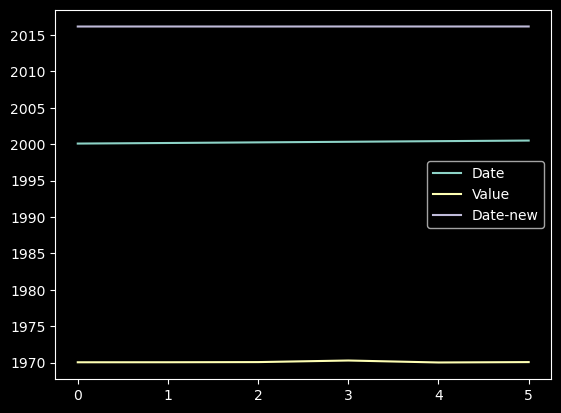

In [317]:
df2.plot()

<Axes: >

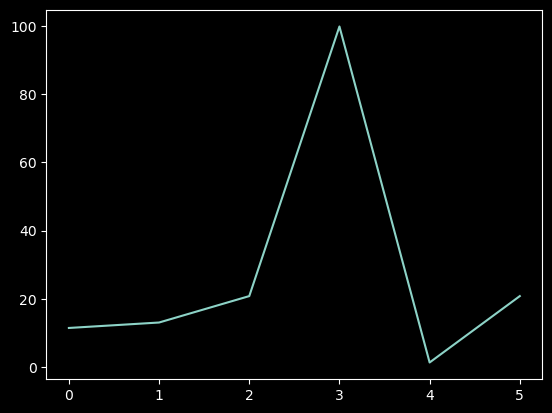

In [319]:
df2["Value"].plot()

<Axes: >

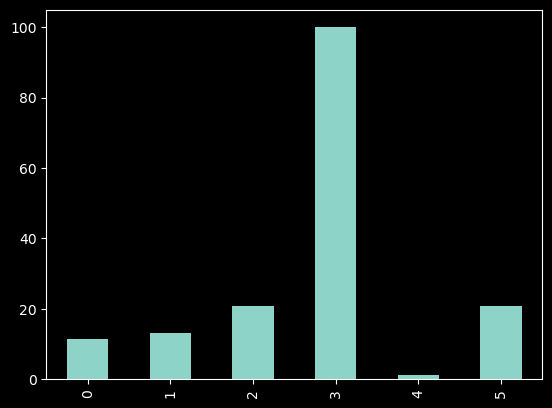

In [320]:
df2["Value"].plot(kind="bar")

array([[<Axes: xlabel='Value', ylabel='Value'>]], dtype=object)

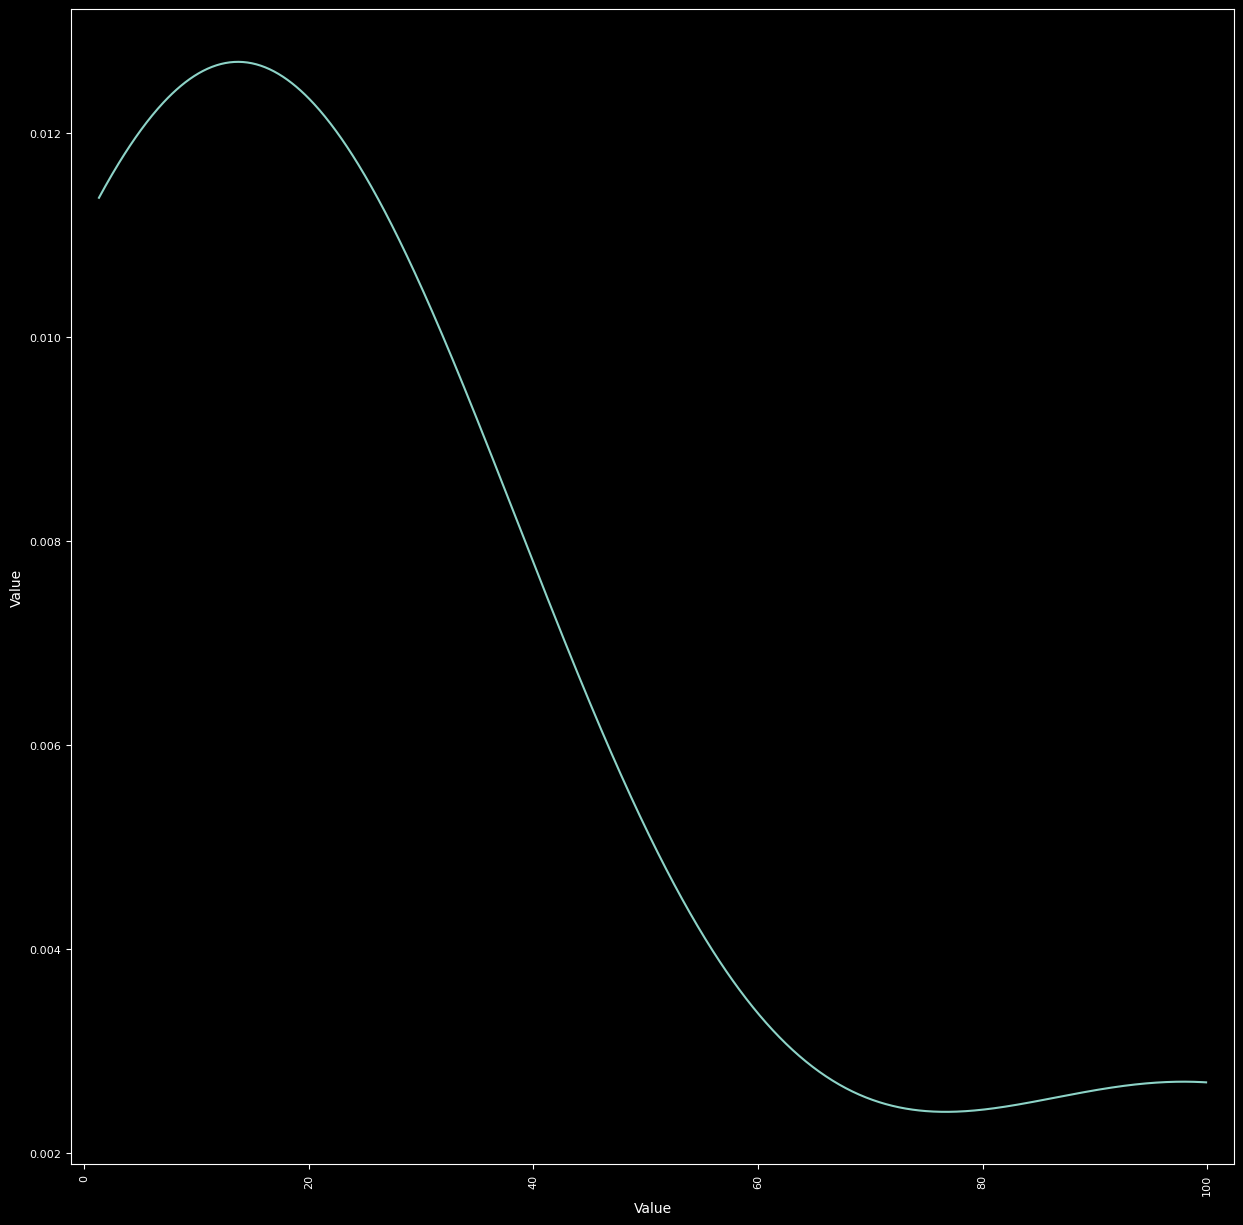

In [325]:
pd.plotting.scatter_matrix(df2, figsize=(15, 15), diagonal="kde")

In [326]:
df2["Value_2"] = df2["Value"]

array([[<Axes: xlabel='Value', ylabel='Value'>,
        <Axes: xlabel='Value_2', ylabel='Value'>],
       [<Axes: xlabel='Value', ylabel='Value_2'>,
        <Axes: xlabel='Value_2', ylabel='Value_2'>]], dtype=object)

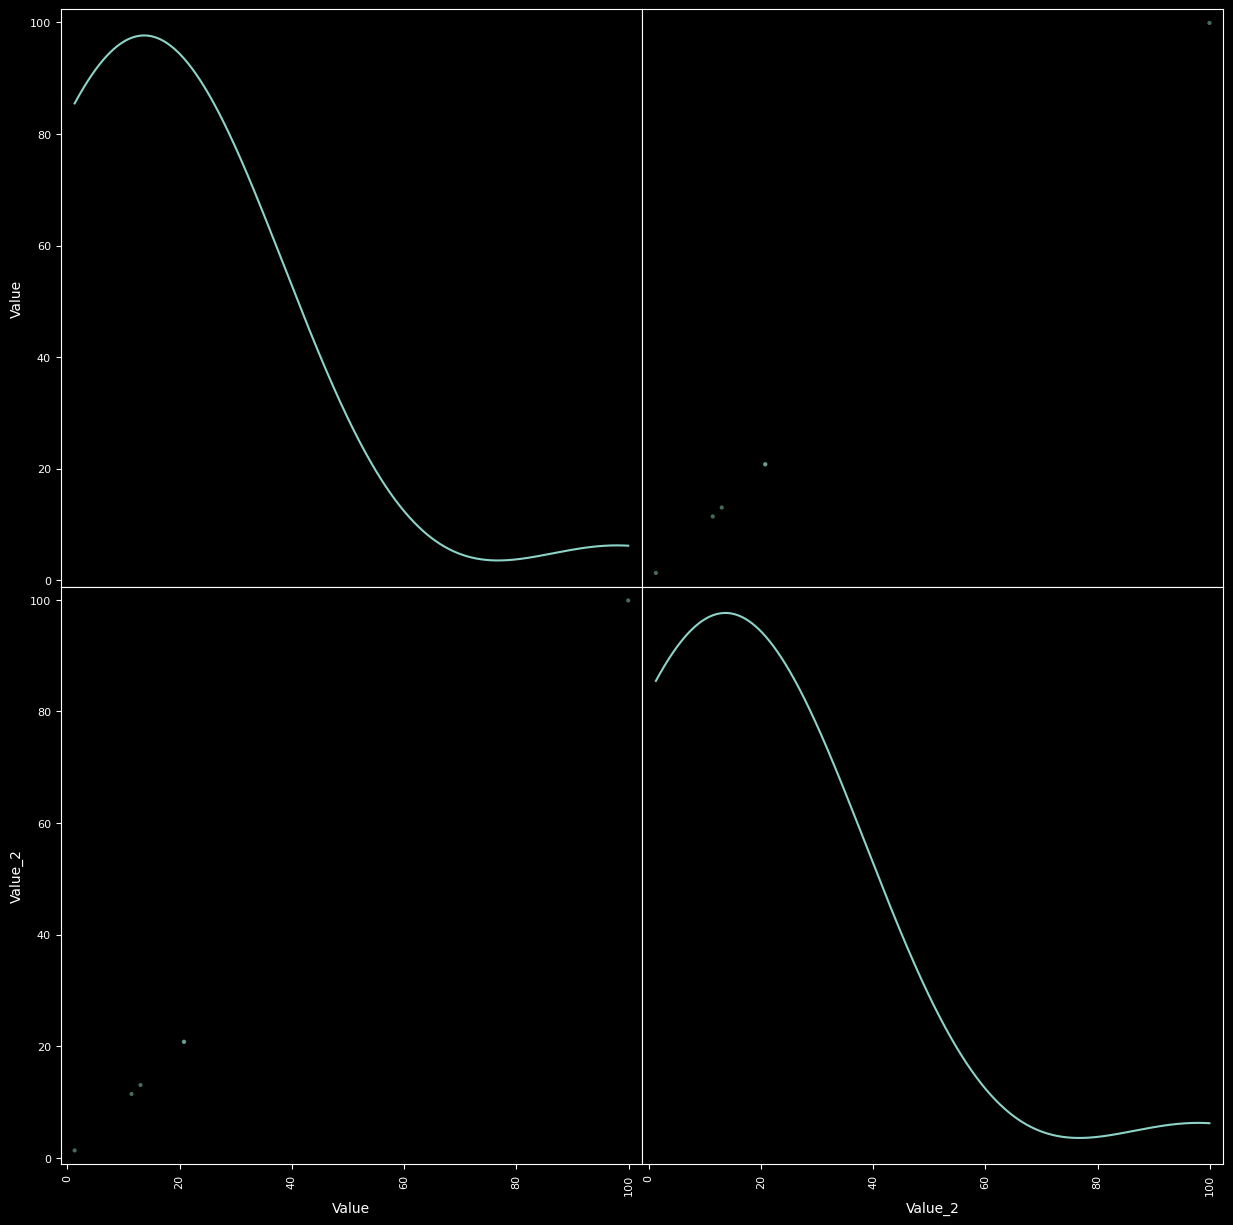

In [327]:
pd.plotting.scatter_matrix(df2, figsize=(15, 15), diagonal="kde")